In [1]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import sys
sys.settrace
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pylab import *
import struct
import array
import os
import glob
import h5py
from scipy.interpolate import griddata

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "serif",
#    "font.serif": ["Palatino"],
#})

plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']
plt.rcParams['font.size'] = '20'

from importlib import reload

/var/folders/2n/ftypqy6s65s2j7krblnn49cw0000gq/T/ipykernel_57208/4017583853.py:28: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']


In [2]:
import athena_read

In [3]:
#This is the integral of blackbody from 0 to nu_t (h\nu/kT)
def FitBlackBody(nu_t):
    integral = 0.0;
    nu_2 = nu_t * nu_t;
    nu_3 = nu_t * nu_2;
    nu_7 = nu_2 * nu_2 * nu_3
    if nu_t < 1.8:
        integral = 0.051329911273422 * nu_3 -0.019248716727533 * nu_t * nu_3 + 0.002566495563671 * nu_2 * nu_3
        -3.055351861513195*1.e-5*nu_7
    elif nu_t < 18.6:
        exp_nu = exp(-nu_t);
        integral = -0.156915538762850 * exp_nu * (nu_3 + 2.69 * nu_2 + 6.714 * nu_t) + 1.000009331428801*(1- exp_nu);
    else:
        integral = 1.0 - 192.1*exp(-0.9014*nu_t)

    return integral;
#This is the blackbody spectrum for each frequency nu_t (h\nu/kT)
def BlackBody(nu, tr):
    nu_t=nu/tr
    exp_1=exp(nu_t)-1
    if nu_t < 1.e-5:
      exp_1=tr**3.0*nu_t**2.0
    else:
      exp_1=nu**3.0/exp_1

    spec=(15/np.pi**4.0)*exp_1

    return spec;

In [4]:
def PlotProfile(datax, datay, xmin, xmax, ymin, ymax,  ylabel, label1, filename, xlabel='$r/r_g$', logscale=0, 
                xlogscale=0, datax1_2=None, datay1_2=None, datay1_3=None, datax2=None, datay2=None, datax2_2=None, 
                datay2_2=None, datay2_3=None, datax3=None, datay3=None, datax3_2=None, datay3_2=None, datay3_3=None, 
                datax4=None, datay4=None, datax4_2=None, datay4_2=None, datax5=None, datay5=None, label2='', 
                label3='', label4='', label5='',title=None,leg_loc=None):
    plots, axes = plt.subplots(figsize=(9,9),dpi=300)
    plt.xlabel(xlabel, size = 30)
    plt.ylabel(ylabel, size = 30)
    plt.subplots_adjust(left=0.15,right=0.88,top=0.9,bottom=0.1)
    plt.ylim([ymin,ymax])
    plt.xlim([xmin,xmax])
    if logscale > 0:
      axes.set_yscale('log')
    if xlogscale > 0:
      axes.set_xscale('log')
    if title is not None:
      plt.title(title,size=20)

    plt.plot(datax,datay,color='black',label=label1,linewidth=3.0)
    if datay1_2 is not None:
        if datax1_2 is not None:
            plt.scatter(datax1_2,datay1_2,s=80,facecolors='none', edgecolors='black')
        else:
            plt.scatter(datax1,datay1_2,s=80,facecolors='none', edgecolors='black')    
    if datay1_3 is not None:
        plt.plot(datax,datay1_3,color='black',linestyle='dashed',linewidth=4.0)
    if datay2 is not None:
        plt.plot(datax2,datay2,color='red',label=label2,linewidth=3.0)
    if datay2_2 is not None:
        if datax2_2 is not None:
            plt.scatter(datax2_2,datay2_2,s=80,facecolors='none', edgecolors='red')
        else:
            plt.scatter(datax2,datay2_2,s=80,facecolors='none', edgecolors='red')       
    if datay2_3 is not None:
        plt.plot(datax2,datay2_3,color='red',linestyle='dashed',linewidth=4.0)
    if datay3 is not None:
        plt.plot(datax3,datay3,color='green',label=label3,linewidth=3.0,linestyle='dashed')
    if datay3_2 is not None:
        if datax3_2 is not None:
            plt.scatter(datax3_2,datay3_2,s=80,facecolors='none', edgecolors='green')
        else:
            plt.scatter(datax3_2,datay3_2,s=80,facecolors='none', edgecolors='green')          
    if datay3_3 is not None:
        plt.plot(datax3,datay3_3,color='green',linestyle='dashed',linewidth=4.0)
    if datay4 is not None:
        plt.plot(datax4,datay4,color='blue',label=label4,linewidth=3.0)
        if datax4_2 is not None:
            plt.scatter(datax4_2,datay4_2,s=80,facecolors='none', edgecolors='blue')
        else:
            plt.scatter(datax4,datay4_2,s=80,facecolors='none', edgecolors='blue')
    if datay5 is not None:
      plt.plot(datax5,datay5,color=tableau20[0],label=label5,linewidth=2.0) 
    if leg_loc is not None:
      plt.legend(loc="best",bbox_to_anchor=leg_loc,frameon=False)
    axes.set_aspect('auto')
#    axes.yaxis.set_tick_params(labelsize=25)
#    axes.xaxis.set_tick_params(labelsize=25)
    plt.savefig(filename)
    plt.close(plots)


In [5]:
files=sorted(glob.glob('Data/thermal*athdf'))
num_file=len(files)

In [6]:
#for filename in files:
ang_file = open('Data/Rad_angles.txt', 'r')
Lines = ang_file.readlines()
angle_line = [ line for line in Lines if  "tau_scheme" in line]
angle_line=angle_line[0]
crat_line = [ line for line in Lines if  "Crat" in line]
crat_line=crat_line[0]
Crat_split=crat_line.split(" ")
Crat=float(Crat_split[size(Crat_split)-2])
angle_index=Lines.index(angle_line)+1
location=Lines.index('fre   spec\n')
tot_line=size(Lines)
nfreq=tot_line-location-1
nu_grid=np.zeros(nfreq)
histories=np.zeros((num_file,52))
for i in range(nfreq):
    line=Lines[i+location+1].split(' ')[0]
    nu_grid[i]=float(line)

nu_center=np.zeros(nfreq-1)
nu_center[:]=(nu_grid[:-1]+nu_grid[1:])/2

#nu_center=np.append(nu_center,nu_grid[nfreq-1])
nang=location-angle_index
mu_x=np.zeros(nang)
mu_y=np.zeros(nang)
mu_z=np.zeros(nang)
weight=np.zeros(nang)
for n in range(nang):
    line=Lines[n+angle_index].split('   ')
    mu_x[n]=float(line[1])
    mu_y[n]=float(line[2])
    mu_z[n]=float(line[3])
    weight[n]=float(line[4].rstrip())

In [7]:
print(files)

['Data/thermal.out4.00000.athdf', 'Data/thermal.out4.00001.athdf', 'Data/thermal.out4.00010.athdf', 'Data/thermal.out4.00100.athdf', 'Data/thermal.out4.01000.athdf', 'Data/thermal.out4.10000.athdf']


In [8]:
Prat=0
#Crat=8.0534e4
count=0
filename=files[0]
with h5py.File(filename, 'r') as f:
  attributes = f.attrs.items()
  attrs = dict(attributes)
  level = f.attrs['MaxLevel']
  time = f.attrs['Time']
  subsample = False

data0 = athena_read.athdf(filename, level=level, subsample=subsample)

filename=files[1]
with h5py.File(filename, 'r') as f:
  attributes = f.attrs.items()
  attrs = dict(attributes)
  level = f.attrs['MaxLevel']
  time1 = f.attrs['Time']
  subsample = False

data1 = athena_read.athdf(filename, level=level, subsample=subsample)

filename=files[2]
with h5py.File(filename, 'r') as f:
  attributes = f.attrs.items()
  attrs = dict(attributes)
  level = f.attrs['MaxLevel']
  time2 = f.attrs['Time']
  subsample = False

data2 = athena_read.athdf(filename, level=level, subsample=subsample)

filename=files[3]
with h5py.File(filename, 'r') as f:
  attributes = f.attrs.items()
  attrs = dict(attributes)
  level = f.attrs['MaxLevel']
  time3 = f.attrs['Time']
  subsample = False

data3 = athena_read.athdf(filename, level=level, subsample=subsample)

filename=files[4]
with h5py.File(filename, 'r') as f:
  attributes = f.attrs.items()
  attrs = dict(attributes)
  level = f.attrs['MaxLevel']
  time4 = f.attrs['Time']
  subsample = False

data4 = athena_read.athdf(filename, level=level, subsample=subsample)

filename=files[5]
with h5py.File(filename, 'r') as f:
  attributes = f.attrs.items()
  attrs = dict(attributes)
  level = f.attrs['MaxLevel']
  time5 = f.attrs['Time']
  subsample = False

data5 = athena_read.athdf(filename, level=level, subsample=subsample)

In [9]:
Te=100
sigma=100
crat=10
tgas=1
x0=0.96703607216555554
nu0=x0*tgas
#the y parameter (\rho\kappa cT/T_e)t
y0=0
y1=time1*sigma*crat*tgas/Te
y2=time2*sigma*crat*tgas/Te
y3=time3*sigma*crat*tgas/Te
y4=time4*sigma*crat*tgas/Te
y5=time5*sigma*crat*tgas/Te
print(y1,y2,y3,y4,y5)
print(time1,time2,time3,time4,time5)

0.015491932863369584 0.10069756768643856 1.006975695490837 10.000042915344238 100.0
0.0015491933 0.010069757 0.10069757 1.0000043 10.0


In [10]:
print(y1,y2,y3,y4,y5)
sol_y_001=np.loadtxt('solution_y_001.txt')
sol_y_01=np.loadtxt('solution_y_01.txt')
sol_y_1=np.loadtxt('solution_y_1.txt')
sol_y_10=np.loadtxt('solution_y_10.txt')
sol_y_100=np.loadtxt('solution_y_100.txt')
fre=sol_y_001[:,0]
nsol_y_001=sol_y_001[:,1]*np.pi**4.0/(15.0*fre**3)
nsol_y_01=sol_y_01[:,1]*np.pi**4.0/(15.0*fre**3)
nsol_y_10=sol_y_10[:,1]*np.pi**4.0/(15.0*fre**3)
nu_ratio=np.exp(log(30/0.03)/200)
dnu_rat=0.5*nu_ratio-0.5/nu_ratio
dnu=dnu_rat*fre
nnusq_001=np.sum(nsol_y_001*fre**2*dnu)
nnusq_01=np.sum(nsol_y_01*fre**2*dnu)
nnusq_10=np.sum(nsol_y_10*fre**2*dnu)
print(nnusq_001,nnusq_01,nnusq_10)

0.015491932863369584 0.10069756768643856 1.006975695490837 10.000042915344238 100.0
1.0001983882030088 1.000198840580471 1.0001946525007508


In [11]:
x1v=data0['x1v']

Er_spec0=np.zeros(nfreq-1)
Er_spec1=np.zeros(nfreq-1)
Er_spec2=np.zeros(nfreq-1)
Er_spec3=np.zeros(nfreq-1)
Er_spec4=np.zeros(nfreq-1)
Er_spec5=np.zeros(nfreq-1)

n_photon0=np.zeros(nfreq-1)
n_photon1=np.zeros(nfreq-1)
n_photon2=np.zeros(nfreq-1)
n_photon3=np.zeros(nfreq-1)
n_photon4=np.zeros(nfreq-1)
n_photon5=np.zeros(nfreq-1)

for i in range(nfreq-1):
    varname='Er_'+str(i)
    Er_spec0[i]=np.mean(data0[varname][0,0,:])/(nu_grid[i+1]-nu_grid[i])
    n_photon0[i]=Er_spec0[i]*(np.pi**4.0/15.0)*(nu_grid[i+1]-nu_grid[i])/nu_center[i]
    Er_spec1[i]=np.mean(data1[varname][0,0,:])/(nu_grid[i+1]-nu_grid[i])
    n_photon1[i]=Er_spec1[i]*(np.pi**4.0/15.0)*(nu_grid[i+1]-nu_grid[i])/nu_center[i]
    Er_spec2[i]=np.mean(data2[varname][0,0,:])/(nu_grid[i+1]-nu_grid[i])
    n_photon2[i]=Er_spec2[i]*(np.pi**4.0/15.0)*(nu_grid[i+1]-nu_grid[i])/nu_center[i]
    Er_spec3[i]=np.mean(data3[varname][0,0,:])/(nu_grid[i+1]-nu_grid[i])
    n_photon3[i]=Er_spec3[i]*(np.pi**4.0/15.0)*(nu_grid[i+1]-nu_grid[i])/nu_center[i]
    Er_spec4[i]=np.mean(data4[varname][0,0,:])/(nu_grid[i+1]-nu_grid[i])
    n_photon4[i]=Er_spec4[i]*(np.pi**4.0/15.0)*(nu_grid[i+1]-nu_grid[i])/nu_center[i]
    Er_spec5[i]=np.mean(data5[varname][0,0,:])/(nu_grid[i+1]-nu_grid[i])
    n_photon5[i]=Er_spec5[i]*(np.pi**4.0/15.0)*(nu_grid[i+1]-nu_grid[i])/nu_center[i]

In [12]:
norm=nnusq_001/sum(n_photon0)
norm_Er_spec0=Er_spec0*norm
norm_Er_spec1=Er_spec1*norm
norm_Er_spec2=Er_spec2*norm
norm_Er_spec3=Er_spec3*norm
norm_Er_spec4=Er_spec4*norm
norm_Er_spec5=Er_spec5*norm

(1e-09, 100)

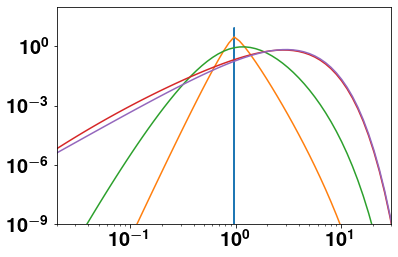

In [13]:
plt.plot(nu_center,Er_spec0)
plt.plot(nu_center,Er_spec1)
plt.plot(nu_center,Er_spec2)
plt.plot(nu_center,Er_spec3)
plt.plot(nu_center,Er_spec4)
#plt.plot(nu_center,Er_spec5)
plt.xscale('log')
plt.xlim(0.02,30)
plt.yscale('log')
plt.ylim(1.e-9,100)

(1e-09, 100)

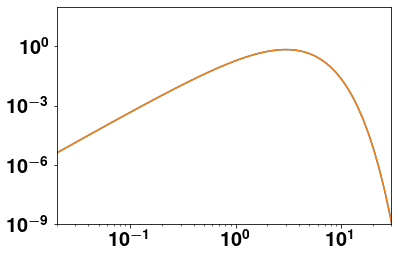

In [14]:
plt.plot(nu_center,Er_spec4)
plt.plot(nu_center,Er_spec5)
plt.xscale('log')
plt.xlim(0.02,30)
plt.yscale('log')
plt.ylim(1.e-9,100)

(1e-09, 10)

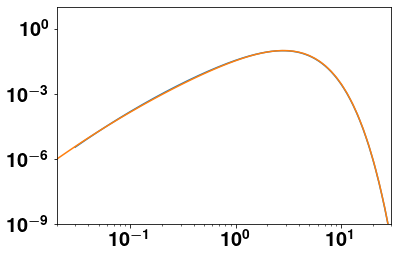

In [15]:
#plt.plot(sol_y_001[:,0],sol_y_001[:,1])
plt.plot(sol_y_1[:,0],sol_y_1[:,1])
plt.plot(nu_center,norm_Er_spec3)
plt.xscale('log')
plt.xlim(0.02,30)
plt.yscale('log')
plt.ylim(1.e-9,10)

#### plot(nu_center,Er_spec)
plt.plot(nu_center,Er_spec0)
plt.plot(nu_center,Er_spec1)
plt.plot(nu_center,Er_spec2)
plt.plot(nu_center,Er_spec3)
plt.xscale("log")
plt.yscale("log")

In [17]:
ylabel='$E_r(\\tilde{\\nu})$'
filename='compton_spectrum_delta.pdf'
xlabel="$\\tilde{\\nu}$"
label2='$y=0.1$'
label3='$y=1$'
label4='$y=10$'
#print(histories[:,0])
PlotProfile(sol_y_001[:,0],sol_y_001[:,1],1.e-2, 1.e2, 1.e-9, 1, ylabel, '$y=0.01$',filename, xlabel,logscale=1,
            xlogscale=1,datax1_2=nu_center, datay1_2=norm_Er_spec1,
            datax2=sol_y_01[:,0],datay2=sol_y_01[:,1], 
           datax2_2=nu_center,datay2_2=norm_Er_spec2,label2=label2,datax3=sol_y_1[:,0],datay3=sol_y_1[:,1],
           datax3_2=nu_center,datay3_2=norm_Er_spec3,label3=label3,
           datax4=sol_y_10[:,0],datay4=sol_y_10[:,1],datax4_2=nu_center,datay4_2=norm_Er_spec4,
           label4=label4, leg_loc=(0.36,0.98))

2.7521655559539795